 <h1><center><strong> Bank Marketing Preduction model (MVP)</strong></center></h1>
 <hr style="color:#E1CF01">

## Step1: Importing Libraries & Reading Data
<hr style="color:#E1CF01">

In [160]:
import numpy as np 
import pandas as pd
import plotly.express as px

# Visualization imports
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from itertools import combinations
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")
import warnings

In [161]:
# Read dataset 
df = pd.read_csv('bankdata.csv', delimiter=';')

In [162]:
# Show first five rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [163]:
# Show last five rows
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [164]:
# Show how many rows and columns
df.shape

(41188, 21)

## Step2: Data Wrangling.
<hr style="color:#E1CF01">

### 2.1 Data Cleaning

In [165]:
# Assess summary of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [166]:
# Assess statistics for each column
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


the "duration" variable is not a good predictor of a potential "yes" because a 0 is an automatic "no" and time spent before a call cannot be known. We will therefore first drop this from our data set

The '999' has significant influence over 'pdays'


In [167]:
# Show null value from all datafream 
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [168]:
# Assess if there are any duplicates.
sum(df.duplicated())

12

In [169]:
# Drop duplicates.
df.drop_duplicates(inplace=True)

We will drop 'unknown' from 
- job
- marital
- education
- housing
- loan

In [170]:
#Delete 'unknown' value from columns
df.drop(df.index[df['job']=='unknown'], inplace=True)
df.drop(df.index[df['marital']=='unknown'], inplace=True)
df.drop(df.index[df['education']=='unknown'], inplace=True)
df.drop(df.index[df['housing']=='unknown'], inplace=True)
df.drop(df.index[df['loan']=='unknown'], inplace=True)

In [171]:
df.shape

(38234, 21)

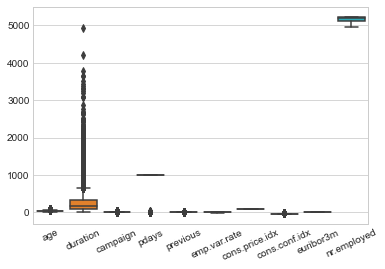

In [172]:
#Check Outlier
sns.boxplot(data=df)
plt.xticks(rotation=25);

In [173]:
#Check Outlier
fig =px.box(df, y="age")
fig.show()

### 2.2 Feature Engineering

In [174]:
# Drop columns they we don't want it
df = df.drop(columns=['default','contact','duration','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axis=1)
df.head()

,age,job,marital,education,housing,loan,month,day_of_week,campaign,y
0,56,housemaid,married,basic.4y,no,no,may,mon,1,no
1,57,services,married,high.school,no,no,may,mon,1,no
2,37,services,married,high.school,yes,no,may,mon,1,no
3,40,admin.,married,basic.6y,no,no,may,mon,1,no
4,56,services,married,high.school,no,yes,may,mon,1,no


In [175]:
# Create a list of continous and categortical variables based on data type
cont_vars = []
cat_vars = []

for col in df.columns: 
    if df[col].dtype == 'O':
        cat_vars.append(col)
    else: 
        cont_vars.append(col)

print(f'There are {len(cat_vars)} categorical variables: \n', cat_vars)
print(f'There are {len(cont_vars)} continuous variables: \n', cont_vars)

There are 8 categorical variables: 
 ['job', 'marital', 'education', 'housing', 'loan', 'month', 'day_of_week', 'y']
There are 2 continuous variables: 
 ['age', 'campaign']


In [176]:
# Check the number of unique values and the percent each value represents
# For each categoritcal variable
for v in cat_vars:
    print(f'Unique values for {v}: {df[v].nunique()}\n', 
          round(df[v].value_counts(normalize=True)* 100, 2), '\n')

Unique values for job: 11
 admin.           25.98
blue-collar      22.39
technician       16.68
services          9.71
management        7.14
retired           4.12
entrepreneur      3.56
self-employed     3.53
housemaid         2.58
unemployed        2.52
student           1.80
Name: job, dtype: float64 

Unique values for marital: 3
 married     60.62
single      28.13
divorced    11.25
Name: marital, dtype: float64 

Unique values for education: 7
 university.degree      30.91
high.school            24.17
basic.9y               15.32
professional.course    13.33
basic.4y               10.47
basic.6y                5.76
illiterate              0.05
Name: education, dtype: float64 

Unique values for housing: 2
 yes    53.81
no     46.19
Name: housing, dtype: float64 

Unique values for loan: 2
 no     84.41
yes    15.59
Name: loan, dtype: float64 

Unique values for month: 10
 may    33.46
jul    17.33
aug    15.22
jun    12.67
nov    10.19
apr     6.37
oct     1.72
sep     1.31
mar 

In [25]:
# Rename the column y to subscribed to a deposit.
# df = df.rename(columns = {'y': 'subscribed to a deposit'}, inplace = False)

## Step3: Exploratory Data Analysis
<hr style="color:#00873e">

### 3.1 Counts of categorical variables

In [177]:
# create a dataframe with only the categroical variables we observed earlier
cat_data = df[cat_vars]
cat_data.head()

,job,marital,education,housing,loan,month,day_of_week,y
0,housemaid,married,basic.4y,no,no,may,mon,no
1,services,married,high.school,no,no,may,mon,no
2,services,married,high.school,yes,no,may,mon,no
3,admin.,married,basic.6y,no,no,may,mon,no
4,services,married,high.school,no,yes,may,mon,no


Plot category counts and relationship with 'y'

We'll plot the overall counts of each categorical variable value and look at the rate of "yeses" we got for each to start looking for possible relationships for a successful marketing campaign.

It will help to first turn our target variable 'y' into a binary dummy so that we can get averages

In [178]:
# one-hot encode the target variable 'y'
cat_data.y = pd.get_dummies(cat_data.y, drop_first=True)
cat_data.head()

,job,marital,education,housing,loan,month,day_of_week,y
0,housemaid,married,basic.4y,no,no,may,mon,0
1,services,married,high.school,no,no,may,mon,0
2,services,married,high.school,yes,no,may,mon,0
3,admin.,married,basic.6y,no,no,may,mon,0
4,services,married,high.school,no,yes,may,mon,0


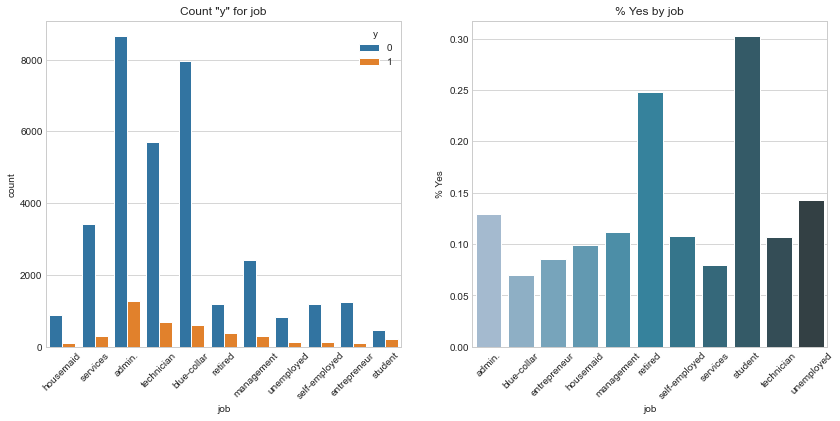

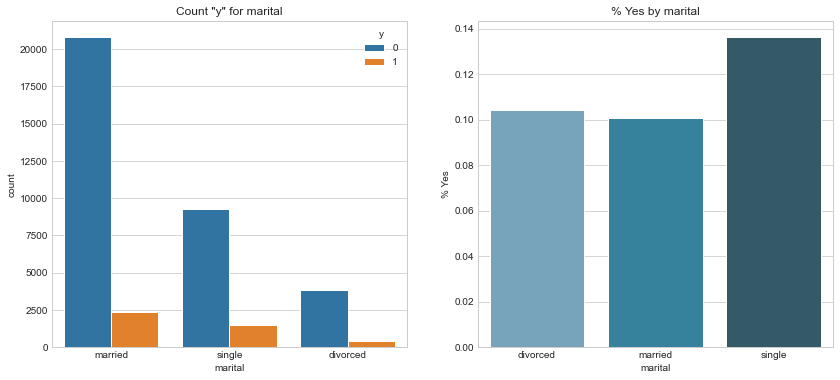

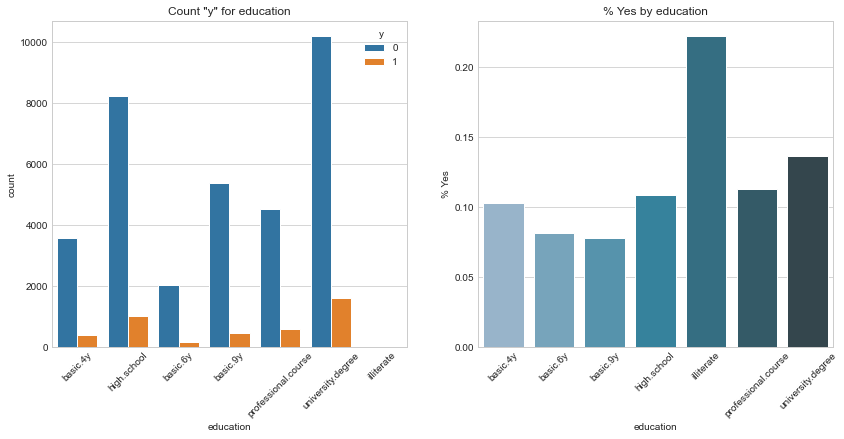

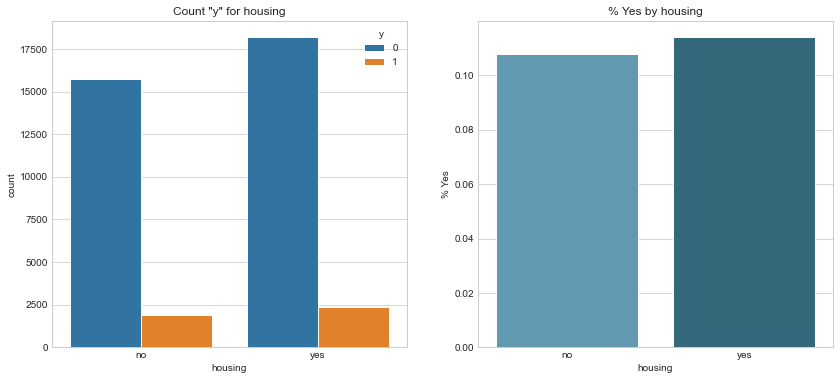

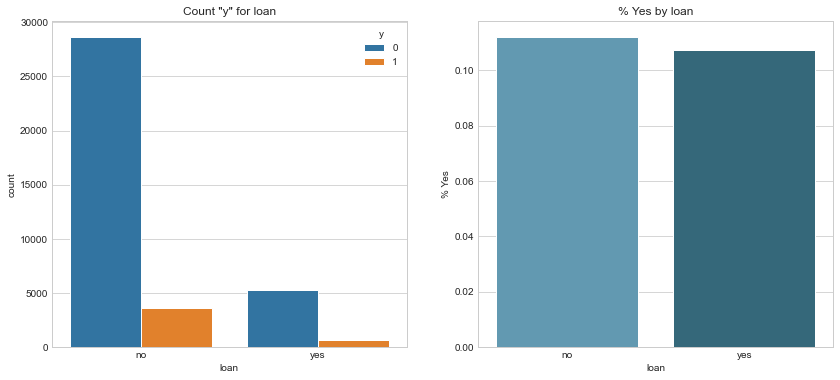

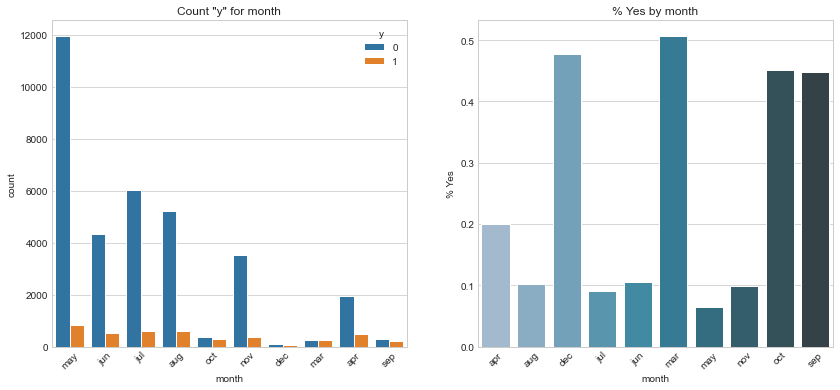

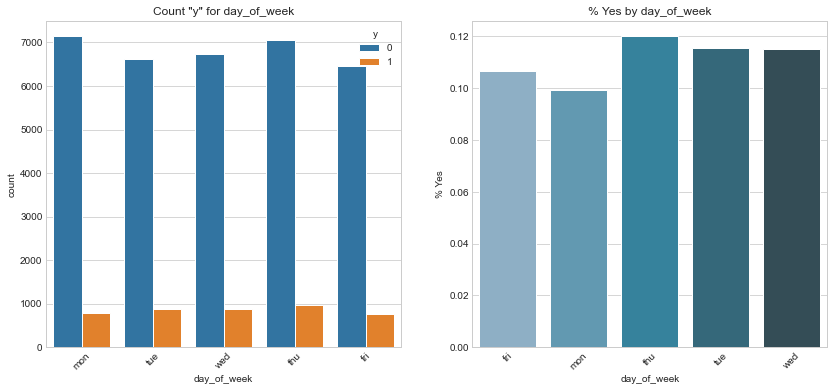

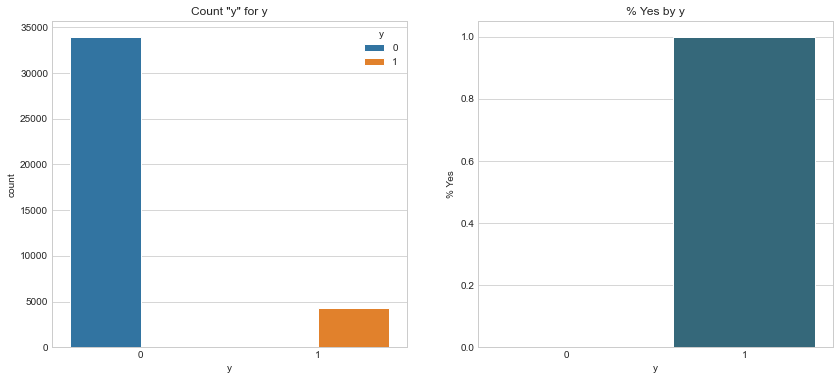

In [179]:
for col in cat_data.columns.values:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_data[col], data=cat_data, hue='y')
    plt.title(f'Count "y" for {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    cat_percent = cat_data.groupby(col)['y'].mean()
    sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')
    plt.ylabel('% Yes')
    plt.title(f'% Yes by {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

### 3.2 Distributions of continuous variables

In [180]:
# check the values we have for continuous variables
cont_vars

['age', 'campaign']

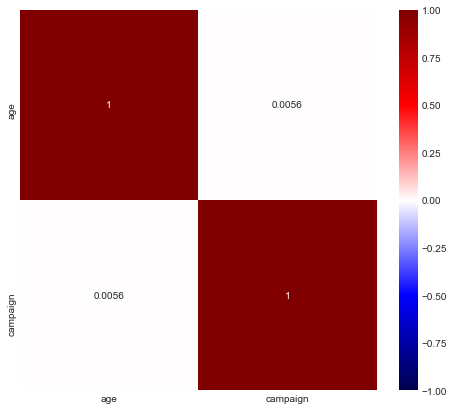

In [181]:
#Plot the correlations between the variables
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

In [182]:
# create a dataframe of continuous variables using our list
cont_data = df[cont_vars]
cont_data.head(2)

,age,campaign
0,56,1
1,57,1


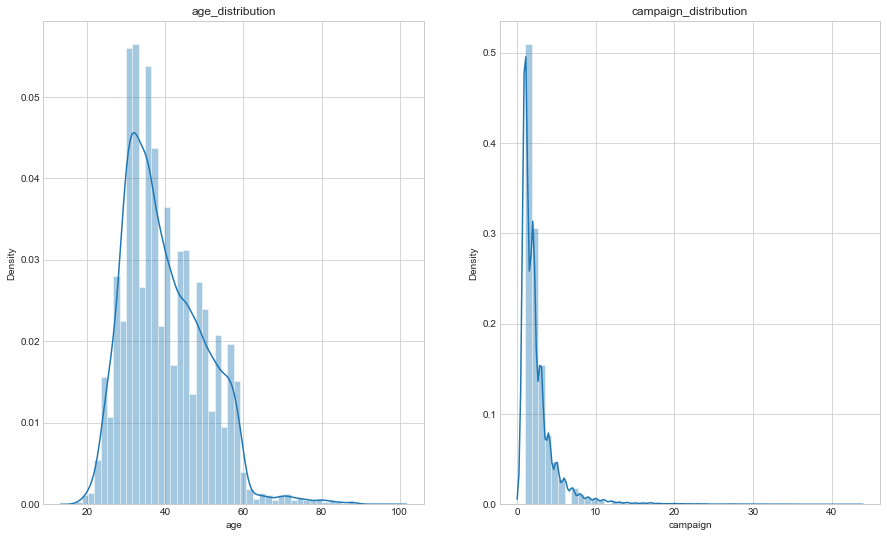

In [183]:
def plot_cont(df):
    
    fig = plt.figure(figsize=(15,20))
    plt.subplots_adjust(hspace=.25)

    nrows = len(df.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(df.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        sns.distplot(a= df[t],   
                     ax=ax)
        plt.title(t + '_distribution')

# plot histograms for the continuus variables
plot_cont(cont_data)

In [184]:
# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.24.1


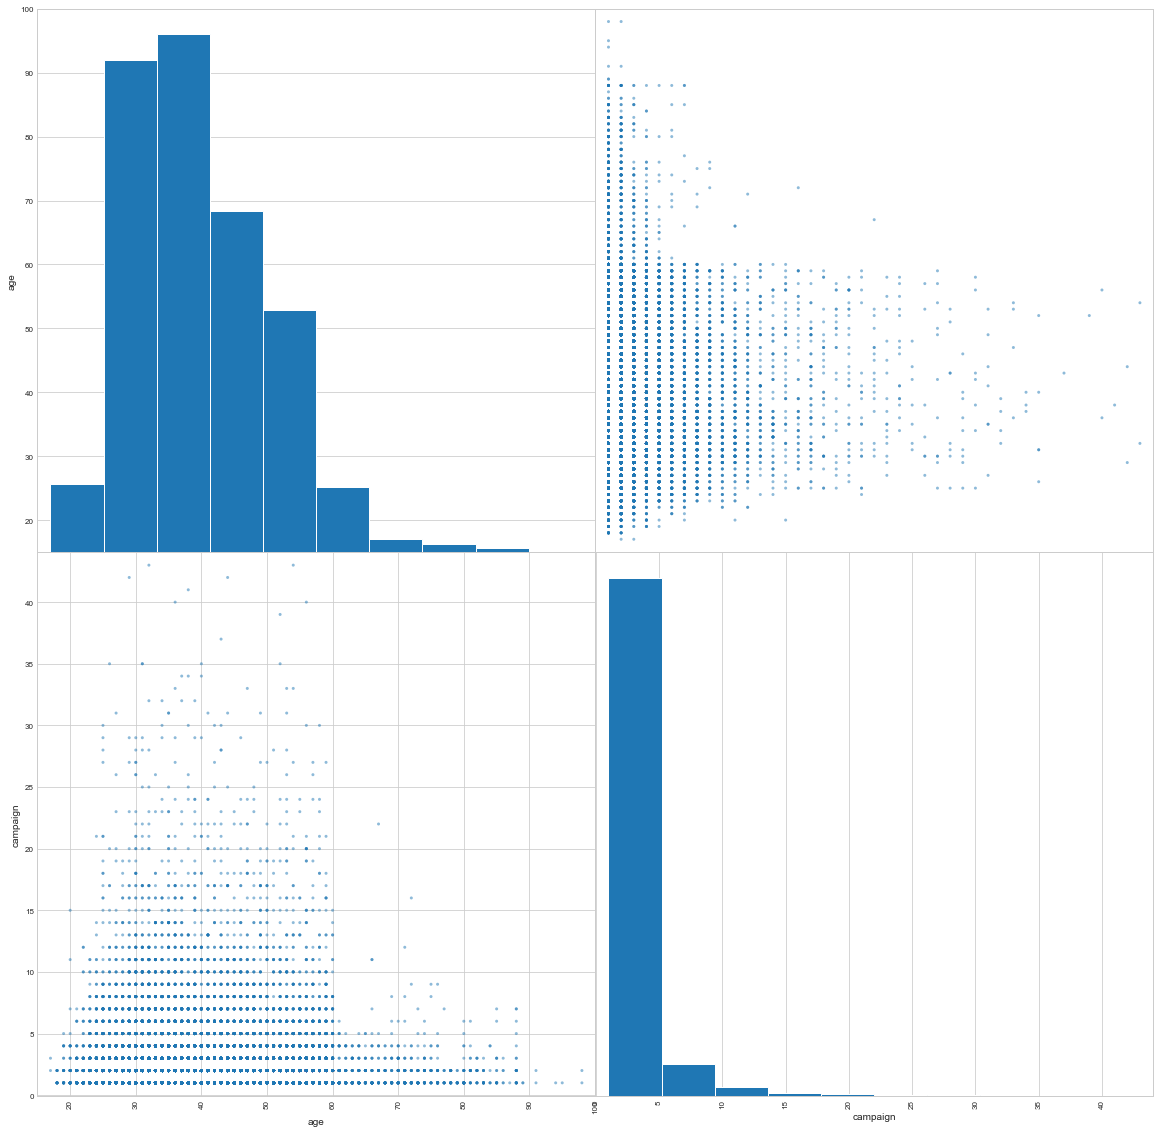

In [185]:
# plot a scatter matrix of all continuous variables and observe realtionships
pd.plotting.scatter_matrix(cont_data, figsize=(20,20));

## Step4: Modeling

### before modeling

In [186]:
# create a copy of our data withour the continuous variables we want to drop
model_data = df.copy()
model_data.head()

,age,job,marital,education,housing,loan,month,day_of_week,campaign,y
0,56,housemaid,married,basic.4y,no,no,may,mon,1,no
1,57,services,married,high.school,no,no,may,mon,1,no
2,37,services,married,high.school,yes,no,may,mon,1,no
3,40,admin.,married,basic.6y,no,no,may,mon,1,no
4,56,services,married,high.school,no,yes,may,mon,1,no


In [187]:
# one-hot encode model_data, check the first 5 rows and shape
data_w_dummies = pd.get_dummies(model_data, drop_first=False)
display(data_w_dummies.head())
data_w_dummies.shape

,age,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,y_no,y_yes
0,56,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,57,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,37,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,40,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,56,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


(38234, 44)

In [188]:
# check column names
data_w_dummies.columns

Index(['age', 'campaign', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'y_no', 'y_yes'],
      dtype='object')

In [189]:
# drop our redundant binary variables and inspect the dataframe
data_w_dummies.drop(columns=['loan_no', 'housing_no', 'y_no'], 
                    inplace=True)
display(data_w_dummies.head())
data_w_dummies.shape

,age,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,y_yes
0,56,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,57,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,37,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,40,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,56,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


(38234, 41)

In [190]:
# Check the value counts our our target variable
data_w_dummies.y_yes.value_counts(normalize=True)

0    0.888659
1    0.111341
Name: y_yes, dtype: float64

In [191]:
# split out our label (target) data and variables
target = data_w_dummies.y_yes
variables = data_w_dummies.drop(columns=['y_yes'])

In [192]:
# check to ensure we've kept the right data
variables.head()

,age,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,57,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,37,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,40,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,56,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [193]:
# split our date into train and test sets and store in a dictionary 'original_data'
X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

original_data = {'X_train': X_train, 'y_train':y_train,
                 'X_test': X_test, 'y_test':y_test}

In [194]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #####

In [195]:
# fit and transform our traing and test data
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# the StandardScaler turns our data into an array, so if we want to see what
# it looks like with our column names we'll need to put it back into a dataframe
scaled_df_train = pd.DataFrame(scaled_data_train, 
                               columns=variables.columns)

scaled_df_test = pd.DataFrame(scaled_data_test, 
                              columns=variables.columns)

display(scaled_df_train.head(2))
display(scaled_df_test.head(2))

,age,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.209312,-0.565724,-0.590466,-0.536505,-0.192342,-0.162532,-0.279153,-0.205695,-0.191561,-0.328501,...,-0.113705,-0.705203,-0.339531,-0.13335,-0.116196,-0.483046,-0.514401,1.950794,-0.493999,-0.495801
1,-1.053594,-0.565724,1.693577,-0.536505,-0.192342,-0.162532,-0.279153,-0.205695,-0.191561,-0.328501,...,-0.113705,-0.705203,-0.339531,-0.13335,-0.116196,-0.483046,-0.514401,1.950794,-0.493999,-0.495801


,age,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,-0.373568,1.945721,1.693577,-0.536505,-0.192342,-0.162532,-0.279153,-0.205695,-0.191561,-0.328501,...,-0.113705,-0.705203,-0.339531,-0.13335,-0.116196,-0.483046,-0.514401,-0.512612,-0.493999,2.016940
1,1.472218,-0.565724,1.693577,-0.536505,-0.192342,-0.162532,-0.279153,-0.205695,-0.191561,-0.328501,...,-0.113705,1.418032,-0.339531,-0.13335,-0.116196,-0.483046,-0.514401,1.950794,-0.493999,-0.495801


In [196]:
# put our scaled data in a dictionary for ease of working with it later
scaled_data = {'X_train': scaled_df_train, 'y_train':y_train, 
               'X_test': scaled_df_test, 'y_test':y_test}

In [197]:
model_results = pd.DataFrame(columns=['model','data','train_accuracy', 
                                      'test_accuracy', 'precision','recall', 
                                      'f1_score'])
model_results

,model,data,train_accuracy,test_accuracy,precision,recall,f1_score


In [198]:
# create a helper function that fits a model to training data
# captures performance metrics, and records them in our dataframe
def add_model_results(model, data, model_name, data_name, df=model_results):
    
    model.fit(data['X_train'], data['y_train'])
    train_preds = model.predict(data['X_train'])
    test_preds = model.predict(data['X_test'])
    p_score = precision_score(data['y_test'], test_preds)
    r_score = recall_score(data['y_test'], test_preds)
    train_accuracy = accuracy_score(data['y_train'], train_preds)
    test_accuracy = accuracy_score(data['y_test'], test_preds)
    f_score = f1_score(data['y_test'], test_preds)
    
    scores = [{'model': model_name, 'data': data_name, 
               'train_accuracy': round(train_accuracy, 3),
               'test_accuracy': round(test_accuracy, 3),
               'precision': round(p_score, 3),
               'recall':round(r_score, 3),
               'f1_score': round(f_score, 3)}]
    
    df = model_results.append(scores, ignore_index=True)
    
    return df

### 4.1 Logistic Regression

In [199]:
## Specify the classifier, in this case LogisticRegression()
logreg = LogisticRegression(random_state=175, solver='lbfgs', max_iter=1000)

In [200]:
# put our diffent data treatments in a list for easy iteration
modeling_data1 = [original_data, scaled_data, ]
modeling_data1_names = ['original_data', 'scaled_data',]

In [201]:
# fit the logreg model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=logreg,
                                      data=d,
                                      model_name="LogisticRegression",
                                      data_name = modeling_data1_names[i])
    print('LogisticRegression: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], logreg.predict(d['X_test'])), '\n')
    
model_results

LogisticRegression: original_data
[[8445   83]
 [ 959   72]] 

LogisticRegression: scaled_data
[[8442   86]
 [ 956   75]] 



,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.887,0.891,0.465,0.070,0.121
1,LogisticRegression,scaled_data,0.887,0.891,0.466,0.073,0.126


In [202]:
## Create a parameter grid to identify optimal parameters
logreg_param_grid = {'C':[.5,1,2],
                     'solver':['lbfgs', 'liblinear'],
                     'class_weight': ['balanced', None]}

In [203]:
# establish the gridsearch model for logreg
logreg_gs = GridSearchCV(logreg, 
                         logreg_param_grid,
                         cv=3, 
                         scoring='recall',
                         n_jobs=-1)

In [204]:
# fit the logreg_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=logreg_gs,
                                      data=d,
                                      model_name="GridSearch-logreg",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-logreg: ', modeling_data1_names[i])
    print('Best parameters: ',  logreg_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], logreg_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-logreg:  original_data
Best parameters:  {'C': 0.5, 'class_weight': 'balanced', 'solver': 'lbfgs'} 

[[6428 2100]
 [ 507  524]] 

GridSearch-logreg:  scaled_data
Best parameters:  {'C': 0.5, 'class_weight': 'balanced', 'solver': 'lbfgs'} 

[[6436 2092]
 [ 508  523]] 



,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.887,0.891,0.465,0.070,0.121
1,LogisticRegression,scaled_data,0.887,0.891,0.466,0.073,0.126
2,GridSearch-logreg,original_data,0.730,0.727,0.200,0.508,0.287
3,GridSearch-logreg,scaled_data,0.731,0.728,0.200,0.507,0.287


### 4.2 KNN

In [205]:

from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [206]:
# fit the logreg model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=knn_clf,
                                      data=d,
                                      model_name="KNeighborsClassifier",
                                      data_name = modeling_data1_names[i])
    print('KNeighborsClassifier: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], knn_clf.predict(d['X_test'])), '\n')
    
model_results

KNeighborsClassifier: original_data
[[8351  177]
 [ 937   94]] 

KNeighborsClassifier: scaled_data
[[8305  223]
 [ 872  159]] 



,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.887,0.891,0.465,0.070,0.121
1,LogisticRegression,scaled_data,0.887,0.891,0.466,0.073,0.126
2,GridSearch-logreg,original_data,0.730,0.727,0.200,0.508,0.287
3,GridSearch-logreg,scaled_data,0.731,0.728,0.200,0.507,0.287
4,KNeighborsClassifier,original_data,0.901,0.883,0.347,0.091,0.144
5,KNeighborsClassifier,scaled_data,0.900,0.885,0.416,0.154,0.225


In [208]:
## Create a parameter grid to identify optimal parameters
knn_param_grid = {'n_neighbors':[3,5,7],
                     'weights':['uniform', 'distance'],
                     'p': [1, 2, 3]}

In [210]:
knn_clf_gs = GridSearchCV(knn_clf,
                          knn_param_grid,
                          scoring='recall', 
                          cv=3,
                          n_jobs=-1)

In [211]:
model_results = add_model_results(model=knn_clf_gs, 
                                  data=scaled_data, 
                                  model_name='GridSearch-KNN',
                                  data_name='scaled_data')

print('KNN Best Parameters: ', knn_clf_gs.best_params_)

print(confusion_matrix(scaled_data['y_test'], 
                       knn_clf_gs.predict(scaled_data['X_test'])))


model_results

KNN Best Parameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
[[7973  555]
 [ 820  211]]


,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.887,0.891,0.465,0.070,0.121
1,LogisticRegression,scaled_data,0.887,0.891,0.466,0.073,0.126
2,GridSearch-logreg,original_data,0.730,0.727,0.200,0.508,0.287
3,GridSearch-logreg,scaled_data,0.731,0.728,0.200,0.507,0.287
4,KNeighborsClassifier,original_data,0.901,0.883,0.347,0.091,0.144
5,KNeighborsClassifier,scaled_data,0.900,0.885,0.416,0.154,0.225
6,GridSearch-KNN,scaled_data,0.986,0.856,0.275,0.205,0.235


### 4.3 Decision Tree 

In [212]:

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5) 

In [213]:
# fit the tree_clf model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=tree_clf,
                                      data=d,
                                      model_name="DecisionTreeClassifier",
                                      data_name = modeling_data1_names[i])
    print('DecisionTreeClassifier: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], tree_clf.predict(d['X_test'])), '\n')
    
model_results

DecisionTreeClassifier: original_data
[[8352  176]
 [ 876  155]] 

DecisionTreeClassifier: scaled_data
[[8352  176]
 [ 876  155]] 



,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.887,0.891,0.465,0.070,0.121
1,LogisticRegression,scaled_data,0.887,0.891,0.466,0.073,0.126
2,GridSearch-logreg,original_data,0.730,0.727,0.200,0.508,0.287
3,GridSearch-logreg,scaled_data,0.731,0.728,0.200,0.507,0.287
4,KNeighborsClassifier,original_data,0.901,0.883,0.347,0.091,0.144
5,KNeighborsClassifier,scaled_data,0.900,0.885,0.416,0.154,0.225
6,GridSearch-KNN,scaled_data,0.986,0.856,0.275,0.205,0.235
7,DecisionTreeClassifier,original_data,0.890,0.890,0.468,0.150,0.228
8,DecisionTreeClassifier,scaled_data,0.890,0.890,0.468,0.150,0.228


In [217]:
# Create a parameter grid to identify optimal parameters
tree_param_grid = {'criterion':['gini', 'entropy'],
                   'max_depth':[3,4,5,None],
                   'min_samples_split': [5, 25, 50, 100]}

In [218]:
# fit the gridsearch to the tree classifier and prioritize recall
tree_clf_gs = GridSearchCV(tree_clf,
                          tree_param_grid,
                          scoring='recall', 
                          cv=3,
                          n_jobs=-1)

In [219]:
# fit the tree_clf_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=tree_clf_gs,
                                      data=d,
                                      model_name="GridSearch-tree",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-tree: ', modeling_data1_names[i])
    print('Best parameters: ',  tree_clf_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], tree_clf_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-tree:  original_data
Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5} 

[[7872  656]
 [ 805  226]] 

GridSearch-tree:  scaled_data
Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5} 

[[7864  664]
 [ 800  231]] 



,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.887,0.891,0.465,0.070,0.121
1,LogisticRegression,scaled_data,0.887,0.891,0.466,0.073,0.126
2,GridSearch-logreg,original_data,0.730,0.727,0.200,0.508,0.287
3,GridSearch-logreg,scaled_data,0.731,0.728,0.200,0.507,0.287
4,KNeighborsClassifier,original_data,0.901,0.883,0.347,0.091,0.144
5,KNeighborsClassifier,scaled_data,0.900,0.885,0.416,0.154,0.225
6,GridSearch-KNN,scaled_data,0.986,0.856,0.275,0.205,0.235
7,DecisionTreeClassifier,original_data,0.890,0.890,0.468,0.150,0.228
8,DecisionTreeClassifier,scaled_data,0.890,0.890,0.468,0.150,0.228
9,GridSearch-tree,original_data,0.953,0.849,0.264,0.225,0.243


In [220]:
# set the optimal parameters for the tree clf and fit again
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=25) 
tree_clf.fit(X=original_data['X_train'], y=original_data['y_train'])

DecisionTreeClassifier(criterion='entropy', min_samples_split=25)

In [221]:
## Create a parameter grid to identify optimal parameters
tree_param_grid = {'criterion':['gini', 'entropy'],
                   'max_depth':[3,4,5,7],
                   'min_samples_split': [5, 25, 50, 100]}

In [222]:
# fit the gridsearch to the tree classifier and prioritize recall
tree_clf_gs = GridSearchCV(tree_clf,
                          tree_param_grid,
                          scoring='recall', 
                          cv=3,
                          n_jobs=-1)

In [223]:
# fit the tree_clf_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=tree_clf_gs,
                                      data=d,
                                      model_name="GridSearch-tree_2",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-tree2: ', modeling_data1_names[i])
    print('Best parameters: ',  tree_clf_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], tree_clf_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-tree2:  original_data
Best parameters:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 100} 

[[8375  153]
 [ 890  141]] 

GridSearch-tree2:  scaled_data
Best parameters:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 100} 

[[8375  153]
 [ 890  141]] 



,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.887,0.891,0.465,0.070,0.121
1,LogisticRegression,scaled_data,0.887,0.891,0.466,0.073,0.126
2,GridSearch-logreg,original_data,0.730,0.727,0.200,0.508,0.287
3,GridSearch-logreg,scaled_data,0.731,0.728,0.200,0.507,0.287
4,KNeighborsClassifier,original_data,0.901,0.883,0.347,0.091,0.144
5,KNeighborsClassifier,scaled_data,0.900,0.885,0.416,0.154,0.225
6,GridSearch-KNN,scaled_data,0.986,0.856,0.275,0.205,0.235
7,DecisionTreeClassifier,original_data,0.890,0.890,0.468,0.150,0.228
8,DecisionTreeClassifier,scaled_data,0.890,0.890,0.468,0.150,0.228
9,GridSearch-tree,original_data,0.953,0.849,0.264,0.225,0.243


### 4.4 Random Forest

In [224]:
# call our random forest classifier and establish baseline parameters
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

In [225]:
# fit the forest model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=forest,
                                      data=d,
                                      model_name="RandomForestClassifier",
                                      data_name = modeling_data1_names[i])
    print('RandomForestClassifier: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], forest.predict(d['X_test'])), '\n')
    
model_results

RandomForestClassifier: original_data
[[8528    0]
 [1031    0]] 

RandomForestClassifier: scaled_data
[[8528    0]
 [1031    0]] 



,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
0,LogisticRegression,original_data,0.887,0.891,0.465,0.070,0.121
1,LogisticRegression,scaled_data,0.887,0.891,0.466,0.073,0.126
2,GridSearch-logreg,original_data,0.730,0.727,0.200,0.508,0.287
3,GridSearch-logreg,scaled_data,0.731,0.728,0.200,0.507,0.287
4,KNeighborsClassifier,original_data,0.901,0.883,0.347,0.091,0.144
5,KNeighborsClassifier,scaled_data,0.900,0.885,0.416,0.154,0.225
6,GridSearch-KNN,scaled_data,0.986,0.856,0.275,0.205,0.235
7,DecisionTreeClassifier,original_data,0.890,0.890,0.468,0.150,0.228
8,DecisionTreeClassifier,scaled_data,0.890,0.890,0.468,0.150,0.228
9,GridSearch-tree,original_data,0.953,0.849,0.264,0.225,0.243


### 4.5 XGBoost

In [236]:
# this script is necessary to run to keep XGBoost from killing the kernal
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [237]:
# Instantiate XGBClassifier
xgb_clf = XGBClassifier()

In [238]:
# fit the xgb_clf model to the original data and show the confusion matrix 
model_results = add_model_results(model=xgb_clf, 
                                  data=original_data, 
                                  model_name='XGBClassifier',
                                  data_name='original_data')

print(confusion_matrix(original_data['y_test'], 
                       xgb_clf.predict(original_data['X_test'])))

[[8390  138]
 [ 890  141]]


In [239]:
model_results.tail()

,model,data,train_accuracy,test_accuracy,precision,recall,f1_score
13,GridSearch-tree_2,original_data,0.892,0.891,0.480,0.137,0.213
14,GridSearch-tree_2,scaled_data,0.892,0.891,0.480,0.137,0.213
15,RandomForestClassifier,original_data,0.887,0.892,0.000,0.000,0.000
16,RandomForestClassifier,scaled_data,0.887,0.892,0.000,0.000,0.000
17,XGBClassifier,original_data,0.910,0.892,0.505,0.137,0.215
